In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as spi
%matplotlib inline
%run pca
%run femshape
%run utils
%run monomials.py

ModuleNotFoundError: No module named 'dolfin'

ModuleNotFoundError: No module named 'dolfin'

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as spi
%matplotlib inline

(235, 150, 2) (235, 150, 2)


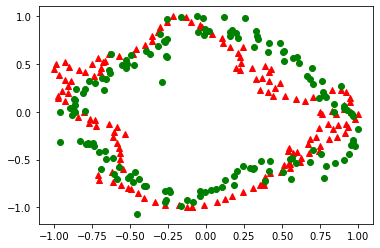

In [18]:
shells = np.genfromtxt('../../AllPots/Data/Shells/shells_coords2.csv', delimiter=',')
nshells = len(shells)
shells = shells.reshape(nshells,150,2)
s2 = np.genfromtxt('/home/marslast/shells_slid1.csv',delimiter=',')
s2 = s2[1:,1:]
s2 = s2.reshape(nshells,150,2)
print(np.shape(shells),np.shape(s2))


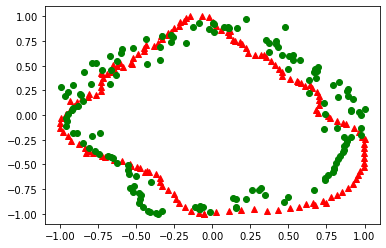

In [26]:
which = 17
pl.plot(shells[which,:,0]/np.max(shells[which,:,0]),shells[which,:,1]/np.max(shells[which,:,1]),'r^')
pl.plot(s2[which,:,1]/np.max(s2[which,:,1]),-s2[which,:,0]/np.max(s2[which,:,0]),'go')

In [3]:
# I think this is the final set, maybe...
shells = np.genfromtxt('../../AllPots/Data/Shells/shells_coords2.csv', delimiter=',')
nshells = len(shells)
shells = shells.reshape(nshells,150,2)
# They are scaled into [-1.5:1.5], so need to halve it
shells = shells/2

# Now we need the Karcher means
km = np.zeros((10,150,2))

species = ["Buccinum","Chicoreus","Conasprella","Conus","Hexaplex","Neptunea","Ocenebra","Ocinebrellus","Siphonalia","Vokesimurex"]

for i in range(10):
    k = np.loadtxt("/home/marslast/Dropbox/Transfer/Pots/Results1120/Shells_KM/Karcher_Mean_"+species[i]+".csv",skiprows=1,delimiter=',')
    k = k[:,2:]
    k /= 1.2*max(np.max(k[:,0]),-np.min(k[:,0]),np.max(k[:,1]),-np.min(k[:,1]))
    km[i,:,:] = k

OSError: /home/marslast/Dropbox/Transfer/Pots/Results1120/Shells_KM/Karcher_Mean_Buccinum.csv not found.

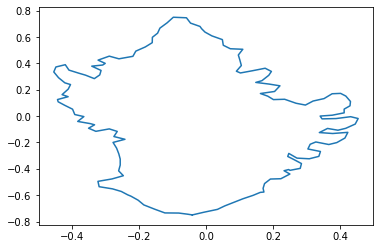

In [181]:
pl.plot(shells[27,:,0],shells[27,:,1])

In [ ]:
#space = Space(order=4, meshsize=18,L=2)
for o in [1,2,4]:
    for m in [16,18,24]:
        for l in [1,2,3]:
            space = Space(order=o, meshsize=m,L=l)
            currents = [Current(space, shell) for shell in shells]
            reps = [Representer(current, scale=.01) for current in currents]
            uv = np.array([rep.get(order=3) for rep in reps])
            uv = uv.reshape(len(reps),-1,order='F')
            np.shape(uv)
            dist = np.zeros((nshells,nshells))
            for i in range(nshells):
                for j in range(i,nshells):
                    dist[i,j] = np.linalg.norm(uv[i,:]-uv[j,:])
            #np.where(dist!=0)
            fname = 'ShellsData2_currents_'+str(o)+'_'+str(m)+'_'+str(l)+'.csv'
            np.savetxt(fname,dist)

In [ ]:
for o in [1,2,4]:
    for m in [16,18,24]:
        for l in [1,2,3]:
            space = Space(order=o, meshsize=m,L=l)
            currents = [Current(space, shell) for shell in shells]
            reps = [Representer(current, scale=.01) for current in currents]
            pe = pca_data(reps)
            pca_reps = PCA(pe, shells[:,:,0], shells[:,:,1],ncomp=20)
            embedding = np.zeros((nshells,20))
            #for i, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
            for i in range(nshells): #, (pr, x1, y1) in enumerate(zip(pca_reps.pr, pca_reps.x, pca_reps.y)):
                embedding[i,:] = pca_reps.pr[i]
                #pl.plot(embedding[:,0],embedding[:,1],'.')
            dist = np.zeros((nshells,nshells))
            for i in range(nshells):
                for j in range(i,nshells):
                    dist[i,j] = np.linalg.norm(embedding[i,:]-embedding[j,:])

            #np.savetxt('FullData_currents_pca_24_dists'+'.csv',dist)
            fname = 'ShellsData2_currents_pca_'+str(o)+'_'+str(m)+'_'+str(l)+'.csv'
            np.savetxt(fname,dist)

In [16]:
shells = shells*4
space = Space(order=4, meshsize=18,L=2)
currents = [Current(space, shell) for shell in shells]
reps = [Representer(current, scale=.01) for current in currents]
uv = np.array([rep.get(order=3) for rep in reps])
uv = uv.reshape(len(reps),-1,order='F')
np.shape(uv)
dist = np.zeros((nshells,nshells))
for i in range(nshells):
    for j in range(i,nshells):
        dist[i,j] = np.linalg.norm(uv[i,:]-uv[j,:])
#np.where(dist!=0)
fname = 'ShellsTest2.csv'
np.savetxt(fname,dist)

In [25]:
space = Space(order=1, meshsize=18,L=2)
currents = [Current(space, shell) for shell in shells]
reps = [Representer(current, scale=.01) for current in currents]
peR = pca_data(reps)
pca_reps = PCA(peR, shells[:,:,0], shells[:,:,1],ncomp=2)

In [66]:
# This sets up the colours for PCA plotting
ind = np.loadtxt('/home/marslast/Projects/AllPots/Code/shell_list.txt')
cl = np.unique(ind[:,2]).astype(int)
print(cl)
import matplotlib.colors as plc
cmap = pl.cm.get_cmap('inferno')
cnorm = plc.Normalize(vmin=0.0,vmax=len(cl))
colours = {}

count = 0
for i in cl:
    colours[i] = cmap((cnorm(count)))
    count += 1

def plotpca(pca,x,y,scaling=None,shift=None):
    pl.figure(figsize=(20,20));
    if scaling is None:
        scaling=1
    print(scaling)
    if shift is None:
        shift = np.array([0,0])
    for i, (pr, x, y) in enumerate(zip(pca, x,y)):
         pl.plot(-pr[0],pr[1],'.',color=colours[int(ind[i,2])],markersize=10);
    for i in range(len(cl)):
        which = np.where(ind[:,2]==cl[i])
        mean = np.squeeze(np.median(pca[which,:],axis=1))
        pl.plot(-mean[0]+ km[i,:,0]/scaling,mean[1] + km[i,:,1]/scaling,color=colours[cl[i]],linewidth=3);
 

[ 11  44  60  72  73 104 138 174 175 241]


[ 11  44  60  72  73 104 138 174 175 241]
0.5


(-13.105163787561699,
 16.67642324448404,
 -18.035308505633076,
 15.376871206563248)

<Figure size 1440x1440 with 0 Axes>

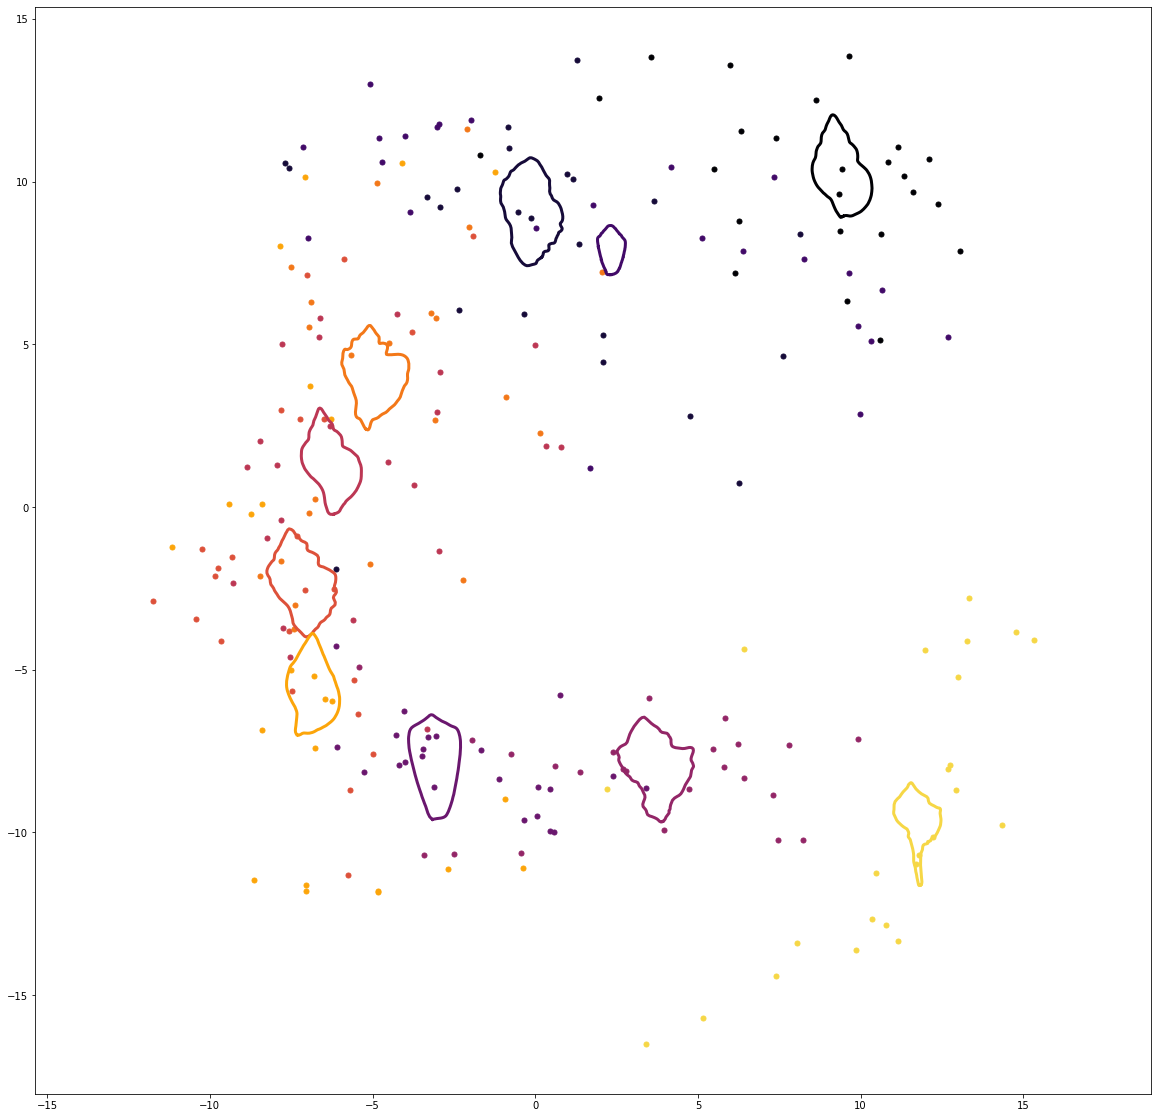

In [84]:
print(cl)
pl.figure(figsize=(20,20))
plotpca(pca_reps.pr,shells[:,:,0],shells[:,:,1],scaling=0.5)
pl.axis('equal')

0.05


<Figure size 1440x1440 with 0 Axes>

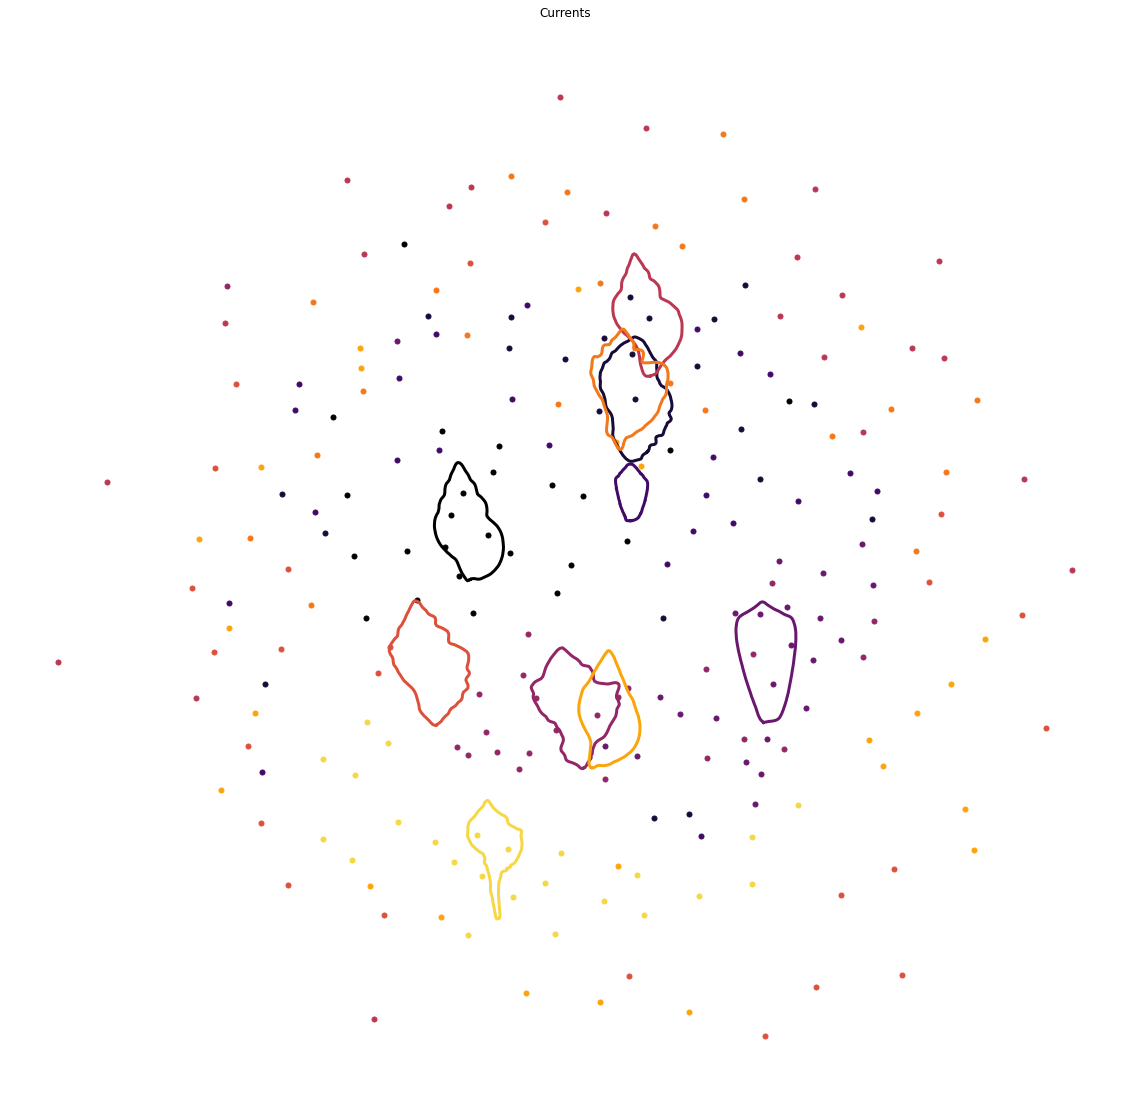

In [85]:
# Beware: the optimisation takes forever!
#peR2 = pca_opt(pca_reps, scaling=2,plot=False)
#np.savetxt('shellsPCA.txt',peR2)
peR2 = np.loadtxt('shellsPCA.txt')
pl.figure(figsize=(20,20))
plotpca(peR2,shells[:,:,0],shells[:,:,1],scaling=0.05)
pl.axis('equal')
pl.axis('off')
pl.title('Currents')
pl.savefig('Currents_shells_PCA.pdf',dpi=600)

20


Text(0.5, 1.0, 'Monomials')

<Figure size 1440x1440 with 0 Axes>

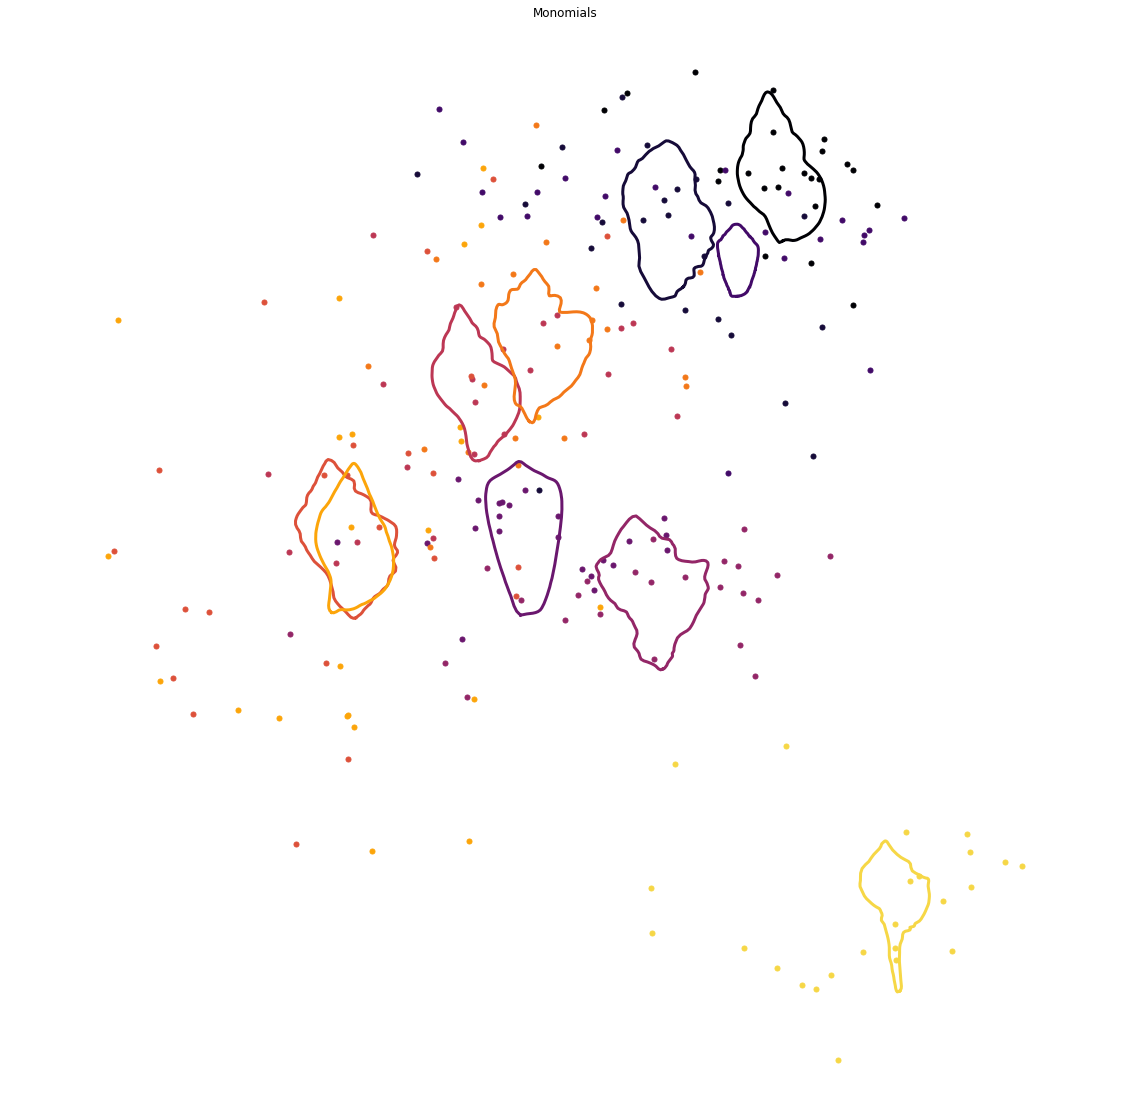

In [83]:
pe = monomial_current_pca(shells[:,:,0], shells[:,:,1], 10)
pcaM = PCA(pe, shells[:,:,0], shells[:,:,1])
pl.figure(figsize=(20,20))
plotpca(pcaM.pr,shells[:,:,0],shells[:,:,1],scaling=20)
pl.axis('equal')
pl.axis('off')
pl.title('Monomials')

10000


Text(0.5, 1.0, 'Monomials')

<Figure size 1440x1440 with 0 Axes>

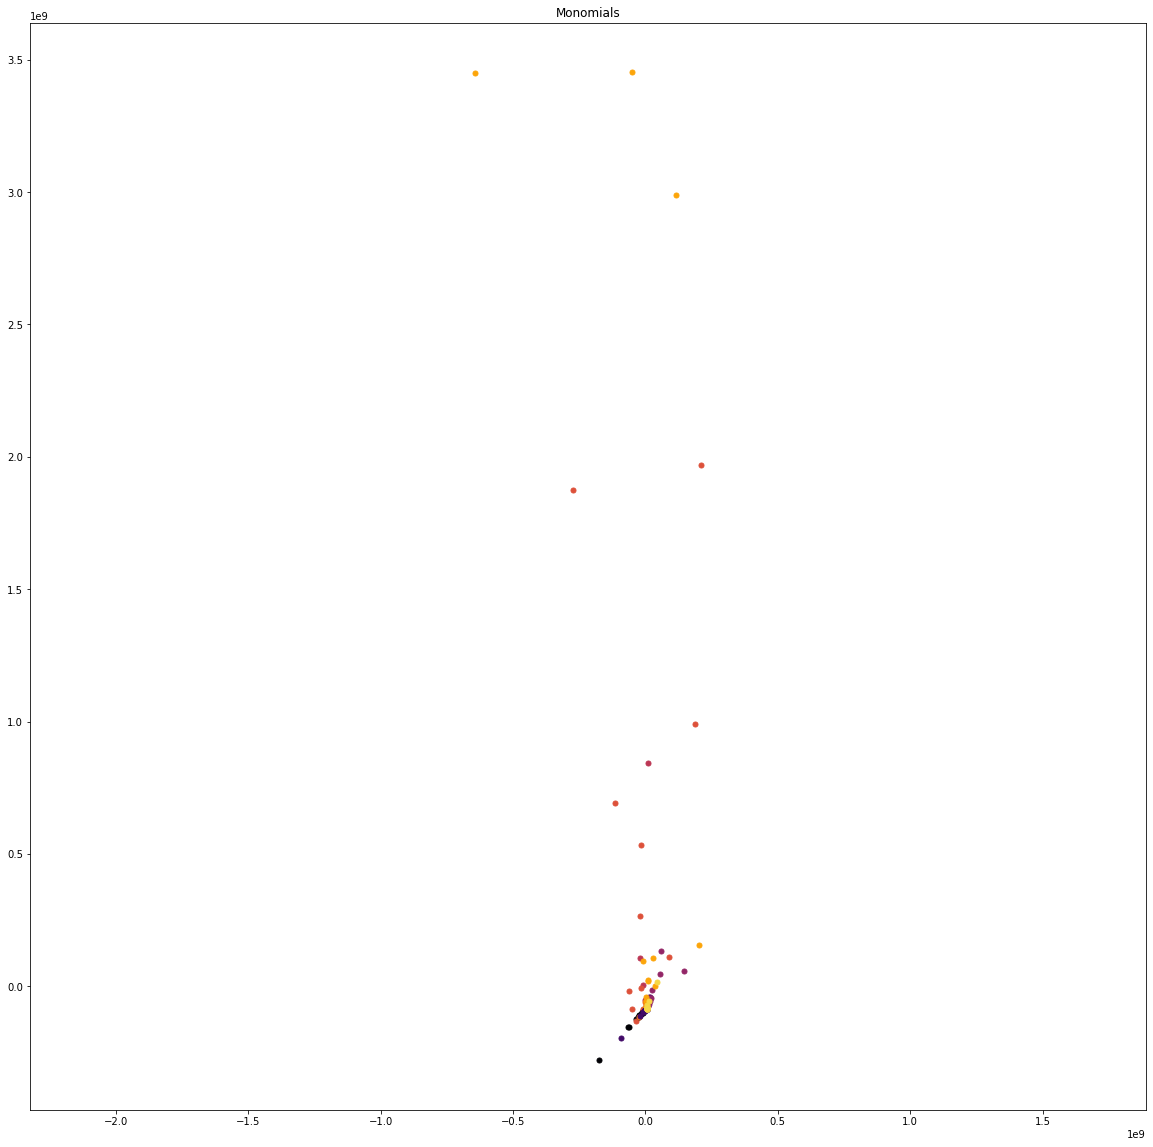

In [81]:
#peM2 = pca_opt(pcaM, scaling=2,plot=False)
#np.savetxt('shellsPCA_M.txt',peM2)
peM2 = np.loadtxt('shellsPCA_M.txt')
pl.figure(figsize=(20,20))
plotpca(peM2,shells[:,:,0],shells[:,:,1],scaling=10000)
pl.axis('equal')
#pl.axis('off')
pl.title('Monomials')

In [178]:
# Some concerns about the difference between the two previous sets of data. Checking it out here.
shells1 = np.genfromtxt('../../AllPots/Data/Shells/shells_coords2.csv', delimiter=',')
shells1 = shells1.reshape(nshells,150,2)
shells2 = np.genfromtxt('../../AllPots/shells_penultimate.csv', delimiter=',')
shells2 = shells2.reshape(nshells,150,2)


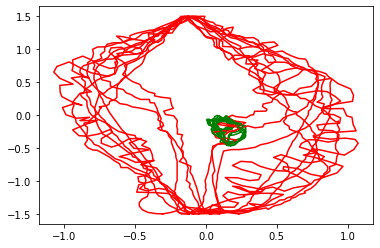

In [179]:
ii = np.arange(nshells)
np.random.shuffle(ii)
for i in ii[:10]:
    pl.plot(shells2[i,:,0],shells2[i,:,1],'g')
    pl.plot(shells1[i,:,0],shells1[i,:,1],'r')